In [3]:
from glob import glob
files = sorted( glob('names/yob*.txt') )
files[:3]

['names/yob1880.txt', 'names/yob1881.txt', 'names/yob1882.txt']

In [4]:
d = {}
firstyear = 1880
lastyear  = 2018
nyears = lastyear - firstyear + 1
print(nyears)
for file in files[:3]:
    year = int( file[-8:-4] )
    with open(file) as f:
        lines = f.read().split('\n') 
    for line in lines:
        #print(line)
        name, gender, count = line.split(',') 
        print(name,gender,count)
        break

139
Mary F 7065
Mary F 6919
Mary F 8148


In [5]:
import numpy as np
d = {}
firstyear = 1880
lastyear  = 2018
nyears = lastyear - firstyear + 1
print(nyears)
for file in files: #[:3]:
    year = int( file[-8:-4] )
    with open(file) as f:
        lines = f.read().split('\n') 
    lines = [line for line in lines if len(line)>2] # exclude blank lines
    for line in lines:
        name, gender, count = line.split(',') 
        #print(name,gender,count)
        if name not in d: 
            # create a new default entry in d for name
            d[name] = {'F': np.zeros(nyears,dtype=int)  , 
                       'M': np.zeros(nyears,dtype=int)  }
        d[name][gender][year-firstyear] = int( count ) # because count is a string
        #break

139


In [14]:
sorted(d.keys()) # dictionary within a dictionary... 
# find a trend and write about it
# find names that have gained popularity in recent years and determine if there is any uniqueness to these names
# sort keys based upon frequency of most recent year
totals = {}


['Aaban',
 'Aabha',
 'Aabid',
 'Aabidah',
 'Aabir',
 'Aabriella',
 'Aada',
 'Aadam',
 'Aadan',
 'Aadarsh',
 'Aadaya',
 'Aaden',
 'Aadesh',
 'Aadhav',
 'Aadhavan',
 'Aadhi',
 'Aadhira',
 'Aadhiran',
 'Aadhvik',
 'Aadhvika',
 'Aadhya',
 'Aadhyan',
 'Aadhyareddy',
 'Aadhyasri',
 'Aadi',
 'Aadian',
 'Aadil',
 'Aadilynn',
 'Aadin',
 'Aadish',
 'Aadison',
 'Aadit',
 'Aadith',
 'Aadithya',
 'Aaditri',
 'Aaditya',
 'Aadiv',
 'Aadon',
 'Aadrian',
 'Aadrika',
 'Aadrit',
 'Aadriti',
 'Aadvi',
 'Aadvik',
 'Aadvika',
 'Aadya',
 'Aadyant',
 'Aadyn',
 'Aafia',
 'Aafiya',
 'Aafiyah',
 'Aafreen',
 'Aagam',
 'Aage',
 'Aagna',
 'Aagot',
 'Aahaan',
 'Aahan',
 'Aahana',
 'Aaheli',
 'Aahil',
 'Aahir',
 'Aahliyah',
 'Aahna',
 'Aahron',
 'Aaidan',
 'Aaiden',
 'Aaidyn',
 'Aaila',
 'Aailiyah',
 'Aailyah',
 'Aaima',
 'Aaira',
 'Aairah',
 'Aaisha',
 'Aaishah',
 'Aaiyana',
 'Aaiza',
 'Aaja',
 'Aajah',
 'Aajaylah',
 'Aajon',
 'Aakanksha',
 'Aakarsh',
 'Aakash',
 'Aakeem',
 'Aakif',
 'Aakil',
 'Aakilah',
 'Aakira',


In [175]:
totals = {}
sums = {}

for key in d.keys():
    sums[key] = {'F': 0, 'M': 0}
    totals[key] = sum(d[key]['F']) + sum(d[key]['M'])
    sums[key]['F'] = sum(d[key]['F'])
    sums[key]['M'] = sum(d[key]['M'])

In [176]:
totals = sorted(totals, key=totals.get, reverse=True)
totals

['James',
 'John',
 'Robert',
 'Michael',
 'Mary',
 'William',
 'David',
 'Joseph',
 'Richard',
 'Charles',
 'Thomas',
 'Christopher',
 'Daniel',
 'Elizabeth',
 'Matthew',
 'Patricia',
 'George',
 'Jennifer',
 'Linda',
 'Anthony',
 'Barbara',
 'Donald',
 'Paul',
 'Mark',
 'Edward',
 'Andrew',
 'Steven',
 'Kenneth',
 'Margaret',
 'Joshua',
 'Kevin',
 'Brian',
 'Susan',
 'Dorothy',
 'Ronald',
 'Sarah',
 'Timothy',
 'Jessica',
 'Jason',
 'Helen',
 'Nancy',
 'Betty',
 'Karen',
 'Jeffrey',
 'Lisa',
 'Ryan',
 'Jacob',
 'Frank',
 'Gary',
 'Nicholas',
 'Anna',
 'Eric',
 'Sandra',
 'Ashley',
 'Stephen',
 'Emily',
 'Jonathan',
 'Kimberly',
 'Donna',
 'Ruth',
 'Carol',
 'Michelle',
 'Larry',
 'Laura',
 'Amanda',
 'Justin',
 'Raymond',
 'Scott',
 'Samuel',
 'Brandon',
 'Melissa',
 'Benjamin',
 'Rebecca',
 'Stephanie',
 'Deborah',
 'Sharon',
 'Kathleen',
 'Cynthia',
 'Gregory',
 'Jack',
 'Shirley',
 'Henry',
 'Amy',
 'Alexander',
 'Patrick',
 'Emma',
 'Angela',
 'Catherine',
 'Virginia',
 'Katherin

In [168]:
genders = {'F': [], 'M': []}
lengths = {'F': [], 'M': []}
i = 0
for item in totals:
    if i < 1000 and i%100 == 0 and i != 0:
        print('M ', len(genders['M']))
        print('F ', len(genders['F']), '  ratio: ', len(genders['F'])/len(genders['M']))
    if i%5000 == 0 and i != 0:
        print('M ', len(genders['M']))
        print('F ', len(genders['F']), '  ratio: ', len(genders['F'])/len(genders['M']))
    if sums[item]['F'] > sums[item]['M']:
        genders['F'].append(item)
    else:
        genders['M'].append(item)
    i += 1
    lengths['F'].append(len(genders['F']))
    lengths['M'].append(len(genders['M']))

M  30
F  70   ratio:  2.3333333333333335
M  69
F  131   ratio:  1.8985507246376812
M  111
F  189   ratio:  1.7027027027027026
M  151
F  249   ratio:  1.6490066225165563
M  194
F  306   ratio:  1.577319587628866
M  243
F  357   ratio:  1.4691358024691359
M  283
F  417   ratio:  1.4734982332155477
M  331
F  469   ratio:  1.4169184290030212
M  377
F  523   ratio:  1.3872679045092837
M  1562
F  3438   ratio:  2.201024327784891
M  3425
F  6575   ratio:  1.9197080291970803
M  5440
F  9560   ratio:  1.7573529411764706
M  7299
F  12701   ratio:  1.7401013837511987
M  9071
F  15929   ratio:  1.7560357182229083
M  10987
F  19013   ratio:  1.7304996814417037
M  12812
F  22188   ratio:  1.731813924445832
M  14674
F  25326   ratio:  1.725909772386534
M  16503
F  28497   ratio:  1.726776949645519
M  18287
F  31713   ratio:  1.7341827527751954
M  20066
F  34934   ratio:  1.7409548489983055
M  21871
F  38129   ratio:  1.743358785606511
M  23652
F  41348   ratio:  1.7481819719262641
M  25434
F  44566  

The trend that I notice is that the gap between the amount of female names compared to male names grows along with the total amount of names. The proportionality converges to approximately 1:1.7, male:female. However in the most common names, it seems to be that the difference in the the ratio of names is smaller. 

138


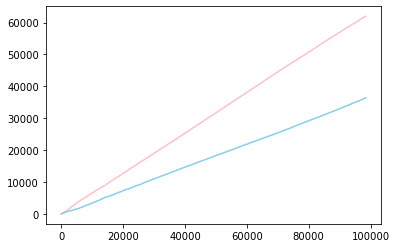

In [165]:
import matplotlib.pyplot as plt
lm = np.array(lengths['M'])
lf = np.array(lengths['F'])
plt.plot(range(len(lf)), lf, color='pink')
plt.plot(range(len(lm)), lm, color='skyblue')

# list comprehensions
are great! Build a new list from an existing list

In [5]:
l = 'abcd'
[ item*3 for item in l ]

['aaa', 'bbb', 'ccc', 'ddd']

In [6]:
l = 'abcd'
[ blah*3 for blah in l if blah != 'b' ]

['aaa', 'ccc', 'ddd']

array([ 9655,  8769,  9557,  8894,  9388,  8756,  9026,  8110,  9247,
        8548,  8502,  7680,  9039,  8049,  8238,  8320,  8138,  7550,
        8159,  6990,  9829,  6900,  7907,  7608,  8108,  8060,  8265,
        8983,  9342,  9591, 11450, 13446, 24587, 29329, 37948, 47576,
       50043, 51853, 56558, 53528, 56913, 58217, 57277, 57470, 59055,
       57199, 56110, 55954, 53755, 52113, 52434, 48423, 48617, 46222,
       46734, 47499, 47669, 48746, 50519, 51015, 54779, 57515, 66027,
       68919, 66610, 66113, 79261, 88319, 82829, 81161, 79424, 81574,
       83138, 80190, 81165, 80054, 80790, 78984, 75991, 76407, 76093,
       79929, 78429, 78625, 82533, 71541, 65032, 61618, 60929, 58771,
       58525, 51518, 43181, 39176, 37638, 35097, 34006, 34227, 34037,
       35434, 35279, 34887, 34705, 33153, 32617, 31500, 30207, 29540,
       29404, 29846, 29077, 27800, 26242, 24989, 24179, 23240, 22182,
       21385, 20627, 20348, 20096, 18889, 17455, 17232, 16449, 15768,
       15166, 14432,

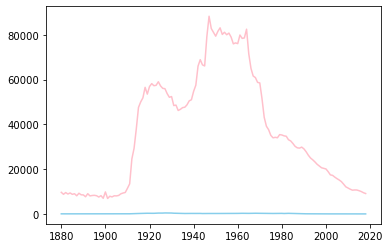

In [156]:
name = 'John'
plt.plot(range(firstyear, lastyear+1), d[name]['F'], color='skyblue')
plt.plot(range(firstyear, lastyear+1), d[name]['M'], color='pink')
d[name]['M']

# Quiz
True or false? "John" had a huge surge in popularity around the times of the First and Second World Wars

Not necessarily: Popularity means high frequency compared to other names

Compute the total in each gender for all the years:

In [135]:
#make arrays of totals across the years
ftotal = np.zeros(nyears, dtype=int)
mtotal = np.zeros(nyears, dtype=int)
for name in d:
    ftotal += d[name]['F']
    mtotal += d[name]['M']
print(sum(ftotal + mtotal))

351653025


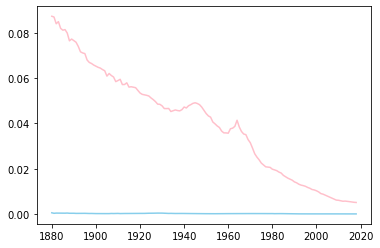

In [10]:
name = 'John'
plt.plot(range(firstyear, lastyear+1), d[name]['F']/ftotal, color = 'skyblue')
plt.plot(range(firstyear, lastyear+1), d[name]['M']/mtotal, color = 'pink')

So, no, "John" experienced an almost unbroken decline in popularity from 1880 to 2018

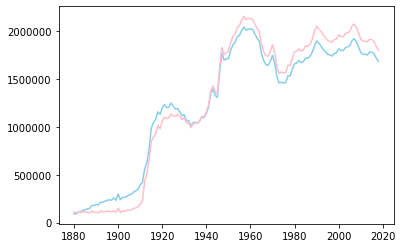

In [12]:
plt.plot(range(firstyear, lastyear+1), ftotal, color='skyblue')
plt.plot(range(firstyear, lastyear+1), mtotal, color = 'pink')

# Gender specificity

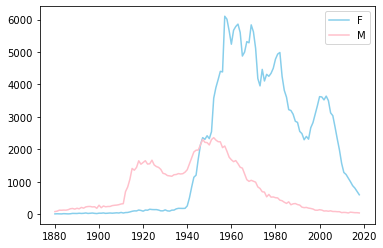

In [13]:
name = 'Leslie'
plt.plot(range(firstyear, lastyear+1), d[name]['F'], color='skyblue', label='F')
plt.plot(range(firstyear, lastyear+1), d[name]['M'], color='pink', label='M')
plt.legend()

Plot female:male ratio

Text(0, 0.5, 'F/M')

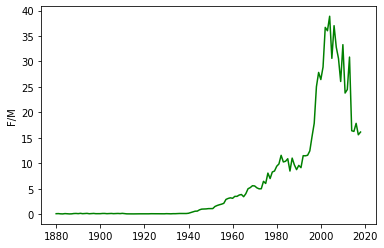

In [14]:
plt.plot(range(firstyear, lastyear+1),
         d[name]['F']/d[name]['M'],
         color='green')
plt.ylabel('F/M')

Let's superimpose plots for many names

Text(0, 0.5, 'F/M')

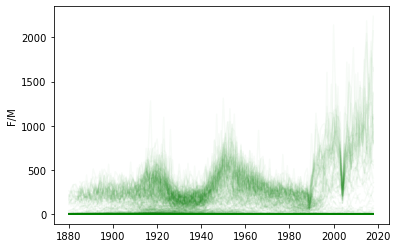

In [15]:
np.seterr(divide='ignore',invalid='ignore')
for i,name in enumerate( d.keys() ):
    plt.plot(range(firstyear, lastyear+1),
            d[name]['F']/d[name]['M'],
            color='green',alpha=0.03)
    if i>1000: break
plt.ylabel('F/M')

Linear scales distinguish big and small, but not big, small and very small.

# Salaries

In [16]:
salaries = {'minimum_wage_worker': 11.10*40*50,
           'Candace Johnson':1.2e6, 
            'Elon Musk':513e6 }

In [17]:
import altair as alt
alt.renderers.enable('notebook')

RendererRegistry.enable('notebook')

In [18]:
import pandas as pd

In [19]:
sdf = pd.DataFrame( salaries.items(), columns=['who', '$'])
sdf

,who,$
0,minimum_wage_worker,22200.0
1,Candace Johnson,1200000.0
2,Elon Musk,513000000.0


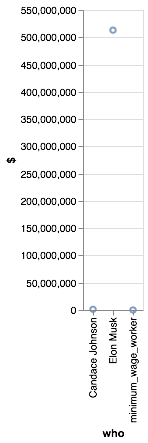

In [20]:
alt.Chart(sdf).mark_point().encode(x='who', y='$')

In [21]:
sdf = pd.DataFrame( salaries.items(), columns=['who', '$'] )
sdf['log10 $'] = sdf['$'].map( np.log10 )
sdf

,who,$,log10 $
0,minimum_wage_worker,22200.0,4.346353
1,Candace Johnson,1200000.0,6.079181
2,Elon Musk,513000000.0,8.710117


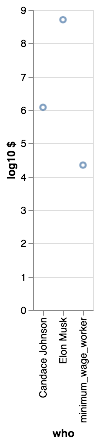

In [22]:
alt.Chart(sdf).mark_point().encode(x='who', y='log10 $')

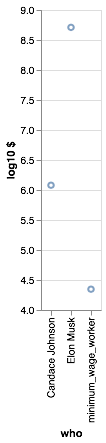

In [23]:
alt.Chart(sdf).mark_point().encode(x='who', y=alt.Y('log10 $',
                                                   scale=alt.Scale(zero=False)))

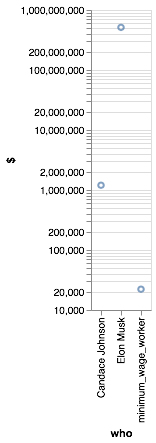

In [24]:
alt.Chart(sdf).mark_point().encode(x='who', y=alt.Y('$',
                                                   scale=alt.Scale(type='log',zero=False)))

Apply logarithmic scaling to the F/M ratio of names

In [25]:
print(len(d),'names altogether')

98400 names altogether


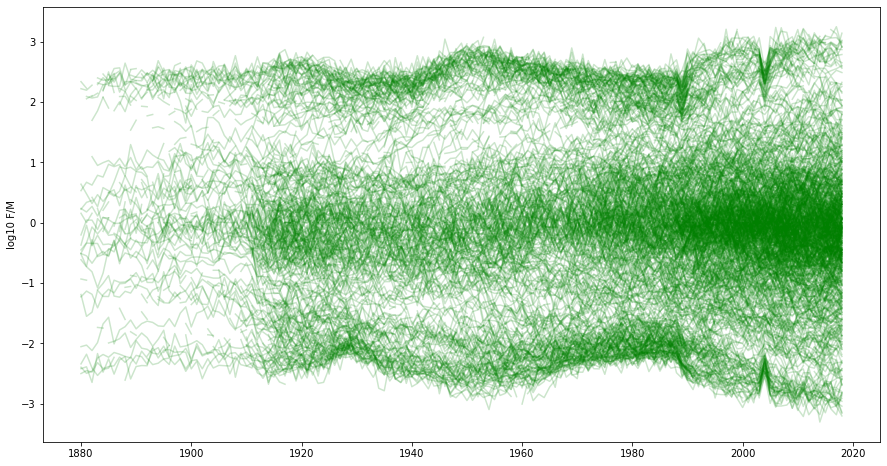

In [26]:
np.seterr(divide='ignore',invalid='ignore') 
plt.figure(figsize=(15,8))
names = list(d.keys())
np.random.shuffle( names )
for i,name in enumerate( names  ):
    plt.plot(range(firstyear,lastyear+1),
         np.log10(d[name]['F']/d[name]['M']),
         color='green',alpha=0.2)
    if i>30000: break
plt.ylabel('log10 F/M');

In [27]:
alt.__version__

'3.2.0'

In [28]:
pd.__version__

'0.25.1'